In [689]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

Import the data into a pandas dataframe and look at the column names

In [690]:
train_df = pd.read_csv('data.csv')
train_df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

List the variable data types

In [691]:
train_df.dtypes

action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

Preview the first 5 rows

In [692]:
train_df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


We can see that there are some redundant features. Kobe has only played for Los Angelas Lakers, so this feature is not relevant for the analysis.

In [693]:
train_df['team_name'].unique()

array(['Los Angeles Lakers'], dtype=object)

In [694]:
train_df['team_id'].unique()

array([1610612747], dtype=int64)

We can drop team_name and team_id. The 'matchup' feature is also not needed since we know it involves LAL and the team labelled in 'opponent'. The season feature can be dropped since the year is already represented in the date. I will split the data into year, month, day

In [695]:
train_df = train_df.drop(['team_name','team_id','matchup','season'], axis=1)

In [696]:
train_df['game_date'] = pd.to_datetime(train_df['game_date'])
train_df['year'] = train_df['game_date'].dt.year
train_df['month'] = train_df['game_date'].dt.month
train_df['day'] = train_df['game_date'].dt.day
train_df['dayofweek'] = train_df['game_date'].dt.weekday

We can see see that the data is not ordered by data. I will order it primarily by the game date, and then the game_event_id

In [697]:
train_df['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 1996, 1997, 1998, 1999],
      dtype=int64)

In [698]:
train_df = train_df.sort_values(['game_date','game_event_id'])
train_df = train_df.drop('game_date',axis=1)

In [699]:
train_df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,shot_id,year,month,day,dayofweek
22901,Jump Shot,Jump Shot,102,29600027,33.9283,-140,116,-118.4098,0,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,MIN,22902,1996,11,3,6
22902,Jump Shot,Jump Shot,127,29600031,33.9473,-131,97,-118.4008,10,2,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,NYK,22903,1996,11,5,1
22903,Jump Shot,Jump Shot,124,29600044,33.8633,-142,181,-118.4118,8,2,...,3PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,CHA,22904,1996,11,6,2
22904,Jump Shot,Jump Shot,144,29600044,34.0443,0,0,-118.2698,6,2,...,3PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,CHA,22905,1996,11,6,2
22905,Jump Shot,Jump Shot,151,29600044,33.9063,-10,138,-118.2798,5,2,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,CHA,22906,1996,11,6,2


I'm going to combine minutes_remaining (0-12min) and seconds_remaining (0-60s) in a single column of floating point numbers, and then drop the original columns.

In [700]:
train_df['period_minutes_remaining'] = train_df['minutes_remaining']+train_df['seconds_remaining']/60
train_df = train_df.drop(['minutes_remaining','seconds_remaining'],axis=1)

We can take a look at the correlation heatmap to see what other features are correlated.

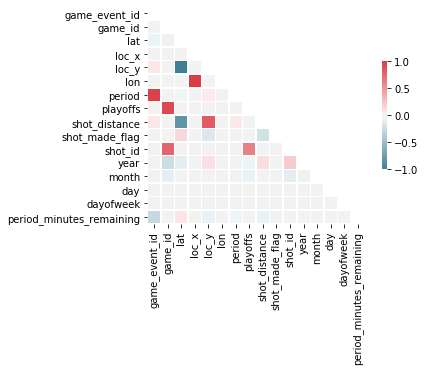

In [701]:
# compute the correlation
corr = train_df.corr()

# set a mask since the correlation matrix is symmetrical along the diagonal
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
                             
sns.heatmap(corr, mask=mask,cmap=cmap, vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The latitude and logitude are redudant with loc_y and loc_x, so these can be dropped.

In [702]:
train_df = train_df.drop(['lon','lat'], axis=1)
train_df.head()

,action_type,combined_shot_type,game_event_id,game_id,loc_x,loc_y,period,playoffs,shot_distance,shot_made_flag,...,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,shot_id,year,month,day,dayofweek,period_minutes_remaining
22901,Jump Shot,Jump Shot,102,29600027,-140,116,1,0,18,0.0,...,Left Side Center(LC),Mid-Range,16-24 ft.,MIN,22902,1996,11,3,6,0.700000
22902,Jump Shot,Jump Shot,127,29600031,-131,97,2,0,16,0.0,...,Left Side Center(LC),Mid-Range,16-24 ft.,NYK,22903,1996,11,5,1,10.133333
22903,Jump Shot,Jump Shot,124,29600044,-142,181,2,0,23,1.0,...,Left Side Center(LC),Mid-Range,16-24 ft.,CHA,22904,1996,11,6,2,8.616667
22904,Jump Shot,Jump Shot,144,29600044,0,0,2,0,0,0.0,...,Center(C),Restricted Area,Less Than 8 ft.,CHA,22905,1996,11,6,2,6.566667
22905,Jump Shot,Jump Shot,151,29600044,-10,138,2,0,13,1.0,...,Center(C),In The Paint (Non-RA),8-16 ft.,CHA,22906,1996,11,6,2,5.450000


Let's take a look at the total types of shots Kobe made. Note that this is on a log scale.

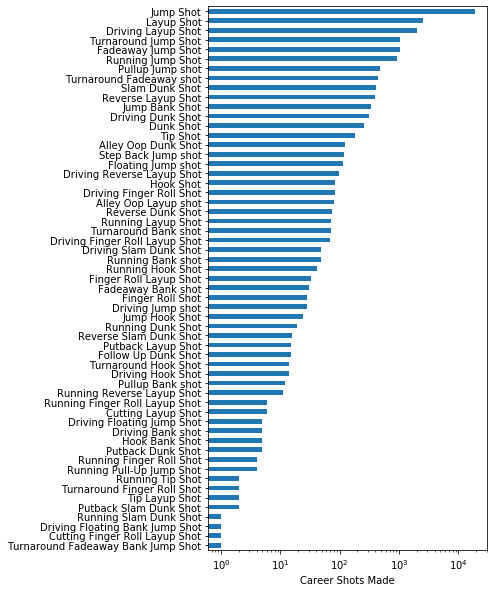

In [703]:
ax = train_df['action_type'].value_counts(ascending=True).plot.barh(logx=True,figsize=(5,10))
ax.set_xlabel('Career Shots Made');

In [704]:
shot_type_df = train_df[['action_type','shot_made_flag','shot_id']].groupby(['action_type','shot_made_flag']).count().unstack()
shot_type_df.columns

MultiIndex([('shot_id', 0.0),
            ('shot_id', 1.0)],
           names=[None, 'shot_made_flag'])

The missed and made shots can be separated

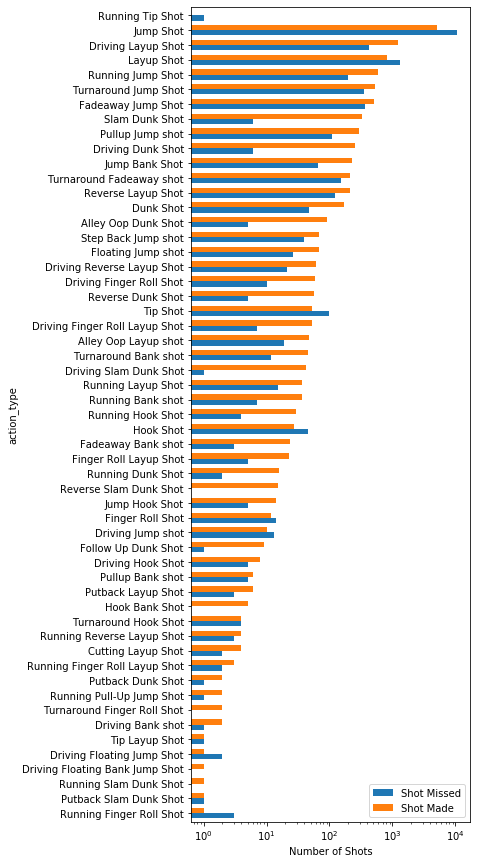

In [705]:
ax = shot_type_df.sort_values(by=('shot_id', 1.0)).plot.barh(logx=True,figsize=(5,15),width=0.7)
ax.legend(['Shot Missed','Shot Made'])
ax.set_xlabel('Number of Shots');

and the success rate for each type of shot is shown below. Even though the jump shot is the most frequently used shot, it doesn't have a high success rate. The slam dunk has the highest success rate since it's so close to the net.

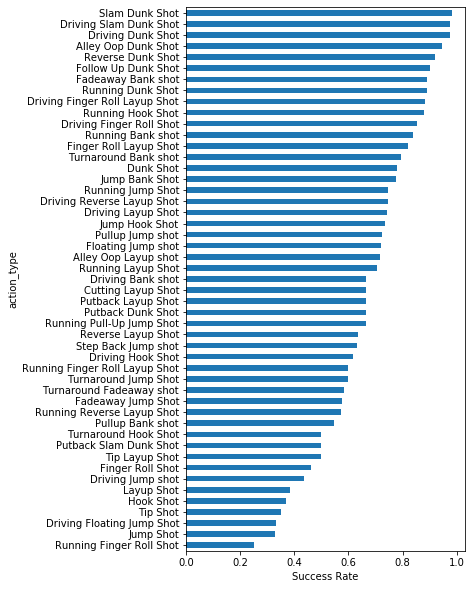

In [706]:
shot_type_df['Shot Success Rate'] = shot_type_df[('shot_id', 1.0)]/(shot_type_df[('shot_id', 1.0)]+shot_type_df[('shot_id', 0.0)])
ax = shot_type_df['Shot Success Rate'].sort_values().dropna().plot.barh(logx=False,figsize=(5,10))
ax.set_xlabel('Success Rate');

I'm interested in seeing the average number of shots Kobe takes during each quarter. The average number of shots is an indication of how often Kobe is on the court.

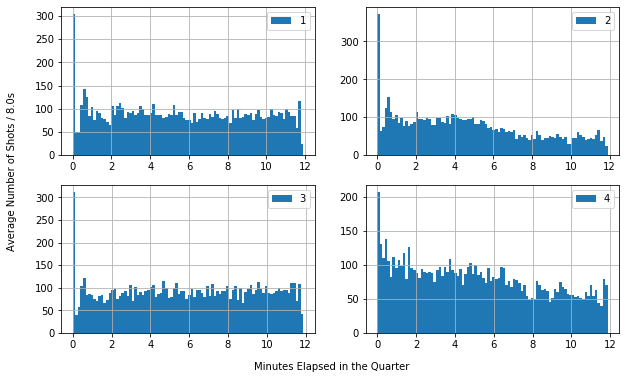

In [707]:
figure, axes = plt.subplots(2, 2,figsize=(10,6))
binsize=90
train_df[train_df['period']==1]['period_minutes_remaining'].hist(bins=binsize, ax=axes[0,0])
train_df[train_df['period']==2]['period_minutes_remaining'].hist(bins=binsize, ax=axes[0,1])
train_df[train_df['period']==3]['period_minutes_remaining'].hist(bins=binsize, ax=axes[1,0])
train_df[train_df['period']==4]['period_minutes_remaining'].hist(bins=binsize, ax=axes[1,1])
figure.text(0.5, 0.04, 'Minutes Elapsed in the Quarter', ha='center')
figure.text(0.05, 0.5, 'Average Number of Shots / '+str(np.round(12/binsize*60,1))+'s', va='center', rotation='vertical')
axes[0,0].legend('1st')
axes[0,1].legend('2nd')
axes[1,0].legend('3rd')
axes[1,1].legend('4th')

We can see that in the second quarter after about 6 minutes, he typically takes a rest. In the 4th quarter, he typically plays more minutes. What's also interesting is the spike in the last minutes of the 4th quarter, indicating that Kobe usually takes the last shot to try to win the game.

Next, I'm going to start preparing the data frame for the machine learning model. I will one-hot encode all the categorical features.

In [709]:
dummies_df = pd.get_dummies(train_df.select_dtypes(include=object))
numeric_df = train_df.select_dtypes(include=['int64','float'])

In [710]:
clean_df = numeric_df.join(dummies_df)
clean_df

,game_event_id,game_id,loc_x,loc_y,period,playoffs,shot_distance,shot_made_flag,shot_id,year,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
22901,102,29600027,-140,116,1,0,18,0.0,22902,1996,...,0,0,0,0,0,0,0,0,0,0
22902,127,29600031,-131,97,2,0,16,0.0,22903,1996,...,0,0,0,0,0,0,0,0,0,0
22903,124,29600044,-142,181,2,0,23,1.0,22904,1996,...,0,0,0,0,0,0,0,0,0,0
22904,144,29600044,0,0,2,0,0,0.0,22905,1996,...,0,0,0,0,0,0,0,0,0,0
22905,151,29600044,-10,138,2,0,13,1.0,22906,1996,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22896,462,21501228,6,-6,4,0,0,1.0,22897,2016,...,0,0,0,0,0,0,0,1,0,0
22897,475,21501228,-7,2,4,0,0,1.0,22898,2016,...,0,0,0,0,0,0,0,1,0,0
22898,479,21501228,69,129,4,0,14,NaN,22899,2016,...,0,0,0,0,0,0,0,1,0,0
22899,482,21501228,-232,110,4,0,25,1.0,22900,2016,...,0,0,0,0,0,0,0,1,0,0


In [711]:
X_test = clean_df[clean_df['shot_made_flag'].isnull()].drop('shot_made_flag',axis=1)
X_train = clean_df[clean_df['shot_made_flag'].notnull()]
y_train = X_train.pop('shot_made_flag')

In [712]:
X_test.head()

,game_event_id,game_id,loc_x,loc_y,period,playoffs,shot_distance,shot_id,year,month,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
22906,157,29600057,75,177,2,0,19,22907,1996,11,...,0,0,0,0,0,0,1,0,0,0
22908,321,29600057,0,0,3,0,0,22909,1996,11,...,0,0,0,0,0,0,1,0,0,0
22925,151,29600126,179,164,2,0,24,22926,1996,11,...,0,1,0,0,0,0,0,0,0,0
22926,156,29600126,-226,30,2,0,22,22927,1996,11,...,0,1,0,0,0,0,0,0,0,0
22929,193,29600126,-27,223,2,0,22,22930,1996,11,...,0,1,0,0,0,0,0,0,0,0


In [713]:
X_train.head()

,game_event_id,game_id,loc_x,loc_y,period,playoffs,shot_distance,shot_id,year,month,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
22901,102,29600027,-140,116,1,0,18,22902,1996,11,...,0,0,0,0,0,0,0,0,0,0
22902,127,29600031,-131,97,2,0,16,22903,1996,11,...,0,0,0,0,0,0,0,0,0,0
22903,124,29600044,-142,181,2,0,23,22904,1996,11,...,0,0,0,0,0,0,0,0,0,0
22904,144,29600044,0,0,2,0,0,22905,1996,11,...,0,0,0,0,0,0,0,0,0,0
22905,151,29600044,-10,138,2,0,13,22906,1996,11,...,0,0,0,0,0,0,0,0,0,0


A plot of the successful shot locations. It can be clearly seen where the 3pt line is.

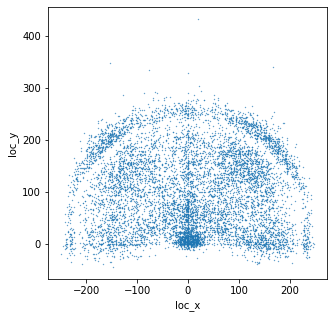

In [714]:
X_train[y_train==1].plot.scatter('loc_x','loc_y',figsize=(5,5), s=0.1)

In 2015-2016, Kobe clearly transitioned to shooting from the 3pt range than 2pt.

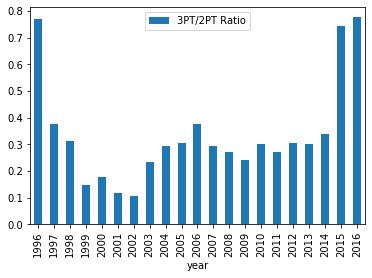

In [715]:
yearly_shot_value = X_train[['shot_type_2PT Field Goal','shot_type_3PT Field Goal','year']].groupby(by='year',as_index=False).sum()
yearly_shot_value['3PT/2PT Ratio'] = yearly_shot_value['shot_type_3PT Field Goal']/yearly_shot_value['shot_type_2PT Field Goal']
yearly_shot_value.plot.bar('year','3PT/2PT Ratio')

Kobe's points total each year. His peak years were from 2000-2012.

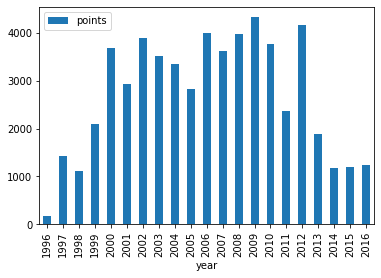

In [716]:
yearly_points = X_train[y_train==1][['shot_type_2PT Field Goal','shot_type_3PT Field Goal','year']].groupby(by='year',as_index=False).sum()
yearly_points['points'] = yearly_shot_value['shot_type_3PT Field Goal']*3 + 2*yearly_shot_value['shot_type_2PT Field Goal']
yearly_points.plot.bar('year','points')

I will rescale the data using a Standard Scaler and then split the training set into a training subset and a validation set.

In [717]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [718]:
from sklearn.model_selection import train_test_split
X_train_scaled2, X_valid, y_train2, y_valid = train_test_split(X_train_scaled, y_train, test_size=0.33, random_state=42)

### Machine Learning Model: Random Forest Regressor
The model will be evaluated based on the log loss error

In [719]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import log_loss
RFR = RandomForestRegressor(n_estimators=200)
RFR.fit(X_train_scaled2, y_train2)
y_pred_valid = RFR.predict(X_valid)
print(log_loss(y_valid,y_pred_valid))
y_pred_testRF = RFR.predict(X_test_scaled)

0.6373874429639029


(array([ 102.,  533., 1508., 2077., 1501.,  798.,  681.,  594.,  337.,
         350.]),
 array([0.005 , 0.1045, 0.204 , 0.3035, 0.403 , 0.5025, 0.602 , 0.7015,
        0.801 , 0.9005, 1.    ]),
 <a list of 10 Patch objects>)

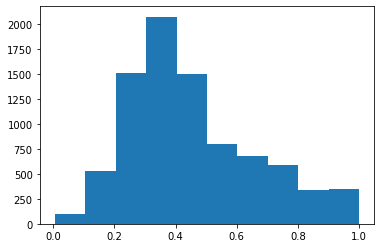

In [720]:
plt.hist(y_pred_valid)

In [391]:
submission_df = X_test

In [401]:
submission_df['shot_made_flag'] = y_pred_testRF.tolist()

In [402]:
submission_df[['shot_id','shot_made_flag']].sort_values(by='shot_id')

,shot_id,shot_made_flag
0,1,0.415
7,8,0.340
16,17,0.435
19,20,0.655
32,33,0.425
...,...,...
30668,30669,0.390
30680,30681,0.335
30682,30683,0.525
30686,30687,0.535


In [403]:
submission_df[['shot_id','shot_made_flag']].to_csv('Submissions_Kobe_RF.csv',index=False)